# Project week 8 - Data Analysis

In [13]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import os 
import numpy as np
from datetime import timedelta
import warnings 
warnings.filterwarnings('ignore')


In [14]:
def load_and_combining(files, file_type="csv"):
    """This function implements automatization for loading the csv files into dataframes and 
    combines all of them into one 
    
    Args:
    files (list): a list of all file present in this directory
    file_type (str, default value): the file 
    
    Return:
    df_combined (dataframe): a concated df of all year
    """
    

    # Define an empty list
    all_df = []
    
    
    # Iterate trough the list FILES
    for file in files:
        # Pick only the file ending with csv 
        if file.endswith(file_type):
            
            # load this file into a dataframe
            df = pd.read_csv(f"./data/{file}", sep=';')
            all_df.append(df)
            
    # Combine all_df
            
    df_combined = pd.concat(all_df, axis=0, ignore_index=True)

    return df_combined

In [15]:
!ls *.csv

zsh:1: no matches found: *.csv


In [16]:
FILES = os.listdir(path="./data")#package os works as a command line
FILES

df_all = load_and_combining(FILES)
df_all

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy
...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy
24873,2019-09-06 21:50:00,1507,checkout
24874,2019-09-06 21:50:00,1508,checkout
24875,2019-09-06 21:50:00,1509,drinks


In [17]:
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    24877 non-null  datetime64[ns]
 1   customer_no  24877 non-null  int64         
 2   location     24877 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 583.2+ KB


1. Calculate the total number of customers in each section

In [18]:
customer_section = pd.DataFrame(df_all.groupby('location')['customer_no'].count())
customer_section

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


In [19]:
fig = px.bar(customer_section, title = 'Total number of customers in each section')
fig.show()

2. Calculate the total number of customers in each section over time

In [20]:
df_all['hour'] = df_all.timestamp.dt.hour
df_all['day'] = df_all.timestamp.dt.day_name()
df_all

,timestamp,customer_no,location,hour,day
0,2019-09-03 07:02:00,1,fruit,7,Tuesday
1,2019-09-03 07:02:00,2,drinks,7,Tuesday
2,2019-09-03 07:03:00,3,dairy,7,Tuesday
3,2019-09-03 07:05:00,1,drinks,7,Tuesday
4,2019-09-03 07:06:00,4,dairy,7,Tuesday
...,...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,21,Friday
24873,2019-09-06 21:50:00,1507,checkout,21,Friday
24874,2019-09-06 21:50:00,1508,checkout,21,Friday
24875,2019-09-06 21:50:00,1509,drinks,21,Friday


In [21]:
df_all = df_all.assign(new_id=  df_all.day.str[0:3]+ '_' + df_all.customer_no.astype(str))
df_all

,timestamp,customer_no,location,hour,day,new_id
0,2019-09-03 07:02:00,1,fruit,7,Tuesday,Tue_1
1,2019-09-03 07:02:00,2,drinks,7,Tuesday,Tue_2
2,2019-09-03 07:03:00,3,dairy,7,Tuesday,Tue_3
3,2019-09-03 07:05:00,1,drinks,7,Tuesday,Tue_1
4,2019-09-03 07:06:00,4,dairy,7,Tuesday,Tue_4
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,21,Friday,Fri_1500
24873,2019-09-06 21:50:00,1507,checkout,21,Friday,Fri_1507
24874,2019-09-06 21:50:00,1508,checkout,21,Friday,Fri_1508
24875,2019-09-06 21:50:00,1509,drinks,21,Friday,Fri_1509


In [22]:
customer_section_over_time = pd.DataFrame(df_all.groupby(['location', 'hour'])['new_id'].count().reset_index())
customer_section_over_time

,location,hour,new_id
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
...,...,...,...
70,spices,17,269
71,spices,18,346
72,spices,19,389
73,spices,20,246


In [23]:
fig = px.bar(customer_section_over_time, x= 'hour', y='new_id', color = 'location',
            title= 'Number of customers in each section over time')
fig.show()

3. Display the number of customers at checkout over time

In [24]:
checkout_time = customer_section_over_time[customer_section_over_time['location'] == 'checkout']
checkout_time

,location,hour,new_id
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
5,checkout,12,384
6,checkout,13,514
7,checkout,14,496
8,checkout,15,412
9,checkout,16,518


In [25]:
fig = px.bar(checkout_time, x= 'hour', y='new_id', color='location', title ='Number of customers at checkout over time')
fig.show()

4. Calculate the time each customer spent in the market

In [26]:
checkout_customers = df_all.loc[df_all.location == 'checkout']['new_id'].unique()
checkout_customers

array(['Tue_8', 'Tue_5', 'Tue_3', ..., 'Fri_1504', 'Fri_1507', 'Fri_1508'],
      dtype=object)

In [27]:
no_checkout = df_all[~df_all['new_id'].isin(checkout_customers)]
len(no_checkout)

79

In [28]:
no_checkout

,timestamp,customer_no,location,hour,day,new_id
4653,2019-09-03 21:29:00,1411,drinks,21,Tuesday,Tue_1411
4669,2019-09-03 21:33:00,1411,spices,21,Tuesday,Tue_1411
4674,2019-09-03 21:34:00,1411,drinks,21,Tuesday,Tue_1411
4679,2019-09-03 21:35:00,1411,spices,21,Tuesday,Tue_1411
4683,2019-09-03 21:36:00,1411,drinks,21,Tuesday,Tue_1411
...,...,...,...,...,...,...
24870,2019-09-06 21:49:00,1505,dairy,21,Friday,Fri_1505
24871,2019-09-06 21:50:00,1496,fruit,21,Friday,Fri_1496
24872,2019-09-06 21:50:00,1500,dairy,21,Friday,Fri_1500
24875,2019-09-06 21:50:00,1509,drinks,21,Friday,Fri_1509


In [29]:
checkout_cus_new = no_checkout.groupby(['new_id'])['timestamp'].max().transform(lambda x: x + timedelta(minutes=1)).reset_index().rename({'timestamp':'timestamp'})
checkout_cus_new['location'] = 'checkout'

In [30]:
checkout_cus_new

,new_id,timestamp,location
0,Fri_1494,2019-09-06 21:50:00,checkout
1,Fri_1496,2019-09-06 21:51:00,checkout
2,Fri_1500,2019-09-06 21:51:00,checkout
3,Fri_1503,2019-09-06 21:50:00,checkout
4,Fri_1505,2019-09-06 21:50:00,checkout
5,Fri_1506,2019-09-06 21:49:00,checkout
6,Fri_1509,2019-09-06 21:51:00,checkout
7,Fri_1510,2019-09-06 21:51:00,checkout
8,Mon_1430,2019-09-02 21:50:00,checkout
9,Mon_1433,2019-09-02 21:50:00,checkout


In [31]:
checkout_cus_new['hour'] = checkout_cus_new.timestamp.dt.hour
checkout_cus_new['day'] = checkout_cus_new.timestamp.dt.day_name()

In [32]:
df_all = df_all.append(checkout_cus_new)
df_all

,timestamp,customer_no,location,hour,day,new_id
0,2019-09-03 07:02:00,1.0,fruit,7,Tuesday,Tue_1
1,2019-09-03 07:02:00,2.0,drinks,7,Tuesday,Tue_2
2,2019-09-03 07:03:00,3.0,dairy,7,Tuesday,Tue_3
3,2019-09-03 07:05:00,1.0,drinks,7,Tuesday,Tue_1
4,2019-09-03 07:06:00,4.0,dairy,7,Tuesday,Tue_4
...,...,...,...,...,...,...
23,2019-09-04 21:50:00,NaN,checkout,21,Wednesday,Wed_1520
24,2019-09-04 21:48:00,NaN,checkout,21,Wednesday,Wed_1527
25,2019-09-04 21:49:00,NaN,checkout,21,Wednesday,Wed_1528
26,2019-09-04 21:50:00,NaN,checkout,21,Wednesday,Wed_1529


In [33]:
time_spent_per_customer = df_all.groupby(by=['new_id'])[['timestamp']].apply(lambda x: x.max() -x.min()).rename({'timestamp':'time_spent'}, axis =1)
time_spent_per_customer

,time_spent
new_id,
Fri_1,0 days 00:05:00
Fri_10,0 days 00:05:00
Fri_100,0 days 00:01:00
Fri_1000,0 days 00:01:00
Fri_1001,0 days 00:10:00
...,...
Wed_995,0 days 00:28:00
Wed_996,0 days 00:11:00
Wed_997,0 days 00:22:00


In [34]:
fig = px.line(time_spent_per_customer, title = 'Time each customer spent in the market')
fig.show()

5. Calculate the total number of customers in the supermarket over time

In [35]:
customer_hour = pd.DataFrame(df_all.groupby('hour')['new_id'].count().rename({'new_id':'count'}))
customer_hour

,new_id
hour,
7,1544
8,2290
9,1520
10,1431
11,1111
12,1252
13,1754
14,1650
15,1335


In [36]:
fig = px.line(customer_hour, title = 'Number of customers over time')
fig.show()

6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [37]:
df_location = df_all[['timestamp', 'new_id', 'location']]
df_location

,timestamp,new_id,location
0,2019-09-03 07:02:00,Tue_1,fruit
1,2019-09-03 07:02:00,Tue_2,drinks
2,2019-09-03 07:03:00,Tue_3,dairy
3,2019-09-03 07:05:00,Tue_1,drinks
4,2019-09-03 07:06:00,Tue_4,dairy
...,...,...,...
23,2019-09-04 21:50:00,Wed_1520,checkout
24,2019-09-04 21:48:00,Wed_1527,checkout
25,2019-09-04 21:49:00,Wed_1528,checkout
26,2019-09-04 21:50:00,Wed_1529,checkout


In [38]:
df_location['firsts'] = df_location.duplicated('new_id')

In [39]:
firsts = df_location[df_location['firsts'] == False]
following = df_location[df_location['firsts'] == True]

In [40]:
first_all = firsts.groupby('location').count()
following_all = following.groupby('location').count()

In [41]:
first_all

,timestamp,new_id,firsts
location,,,
dairy,2141,2141,2141
drinks,1143,1143,1143
fruit,2810,2810,2810
spices,1351,1351,1351


In [42]:
following_all

,timestamp,new_id,firsts
location,,,
checkout,7445,7445,7445
dairy,2538,2538,2538
drinks,2762,2762,2762
fruit,2312,2312,2312
spices,2403,2403,2403


* Distribution of customers of their first visited section versus following sections

In [43]:
# First Section plot
fig1 = go.Figure([go.Bar(x=first_all.index, y=first_all['new_id'])])
fig1.update_layout(title='First Section')
fig1.show()

# Following Sections plot
fig2 = go.Figure([go.Bar(x=following_all.index, y=following_all['new_id'])])
fig2.update_layout(title='Following Sections')
fig2.show()


## Revenue estimate

Total revenue for a customer using the following table:

revenue per minute
fruit
4€
spices
3€
dairy
5€
drinks
6€


In [44]:
df_all

,timestamp,customer_no,location,hour,day,new_id
0,2019-09-03 07:02:00,1.0,fruit,7,Tuesday,Tue_1
1,2019-09-03 07:02:00,2.0,drinks,7,Tuesday,Tue_2
2,2019-09-03 07:03:00,3.0,dairy,7,Tuesday,Tue_3
3,2019-09-03 07:05:00,1.0,drinks,7,Tuesday,Tue_1
4,2019-09-03 07:06:00,4.0,dairy,7,Tuesday,Tue_4
...,...,...,...,...,...,...
23,2019-09-04 21:50:00,NaN,checkout,21,Wednesday,Wed_1520
24,2019-09-04 21:48:00,NaN,checkout,21,Wednesday,Wed_1527
25,2019-09-04 21:49:00,NaN,checkout,21,Wednesday,Wed_1528
26,2019-09-04 21:50:00,NaN,checkout,21,Wednesday,Wed_1529


In [45]:
df_all['revenue_per_minute'] = 'NA'
df_all.loc[(df_all['location'] == 'fruit'), 'revenue_per_minute'] = 4 
df_all.loc[(df_all['location'] == 'spices'), 'revenue_per_minute'] = 3
df_all.loc[(df_all['location'] == 'dairy'), 'revenue_per_minute'] = 5
df_all.loc[(df_all['location'] == 'drinks'), 'revenue_per_minute'] = 6
df_all.loc[(df_all['location'] == 'checkout'), 'revenue_per_minute'] = 0

### Resample

In [46]:
df_all = df_all.set_index('timestamp')

In [47]:
df_all

,customer_no,location,hour,day,new_id,revenue_per_minute
timestamp,,,,,,
2019-09-03 07:02:00,1.0,fruit,7,Tuesday,Tue_1,4
2019-09-03 07:02:00,2.0,drinks,7,Tuesday,Tue_2,6
2019-09-03 07:03:00,3.0,dairy,7,Tuesday,Tue_3,5
2019-09-03 07:05:00,1.0,drinks,7,Tuesday,Tue_1,6
2019-09-03 07:06:00,4.0,dairy,7,Tuesday,Tue_4,5
...,...,...,...,...,...,...
2019-09-04 21:50:00,NaN,checkout,21,Wednesday,Wed_1520,0
2019-09-04 21:48:00,NaN,checkout,21,Wednesday,Wed_1527,0
2019-09-04 21:49:00,NaN,checkout,21,Wednesday,Wed_1528,0


In [48]:
df_all = df_all.groupby('new_id').resample('min').ffill().drop(columns = ['new_id']).reset_index()

### Calculate the revenue

In [49]:
df_all

,new_id,timestamp,customer_no,location,hour,day,revenue_per_minute
0,Fri_1,2019-09-06 07:00:00,1.0,dairy,7,Friday,5
1,Fri_1,2019-09-06 07:01:00,1.0,dairy,7,Friday,5
2,Fri_1,2019-09-06 07:02:00,1.0,dairy,7,Friday,5
3,Fri_1,2019-09-06 07:03:00,1.0,dairy,7,Friday,5
4,Fri_1,2019-09-06 07:04:00,1.0,spices,7,Friday,3
...,...,...,...,...,...,...,...
53926,Wed_998,2019-09-04 16:57:00,998.0,fruit,16,Wednesday,4
53927,Wed_998,2019-09-04 16:58:00,998.0,fruit,16,Wednesday,4
53928,Wed_998,2019-09-04 16:59:00,998.0,checkout,16,Wednesday,0
53929,Wed_999,2019-09-04 16:53:00,999.0,fruit,16,Wednesday,4


### The most profitable section

In [50]:
df_all.groupby("new_id")[["revenue_per_minute"]].sum().sort_values(
    "revenue_per_minute", ascending=False
)

,revenue_per_minute
new_id,
Thu_1047,249
Wed_710,241
Mon_666,236
Fri_102,234
Thu_872,226
...,...
Fri_1274,3
Wed_672,3
Tue_286,3


In [51]:
df_all.groupby("location")[["revenue_per_minute"]].sum().sort_values(
    "revenue_per_minute", ascending=False
)

,revenue_per_minute
location,
dairy,88870
drinks,58356
fruit,50832
spices,18834
checkout,0


In [52]:
# Group by location and calculate the sum of revenue_per_minute
df_revenue = df_all.groupby("location")[["revenue_per_minute"]].sum()
#Sort
df_revenue = df_revenue.sort_values("revenue_per_minute", ascending=False)
trace = go.Bar(x=df_revenue.index, y=df_revenue['revenue_per_minute'])

layout = go.Layout(title='Revenue per minute by location')
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [53]:
df_all['time'] = df_all.timestamp.dt.time

In [54]:
df_location_time = df_all.groupby(['location', 'time'])[['new_id']].count()

In [55]:
df_location_time

new_id
location time            
checkout 07:01:00       2
         07:02:00       5
         07:03:00       1
         07:04:00       2
         07:05:00       7
...                   ...
spices   21:46:00       5
         21:47:00       2
         21:48:00       5
         21:49:00       3
         21:50:00       1

[4453 rows x 1 columns]

In [56]:
df_unstack_location_time = df_location_time.unstack(level=0)
df_unstack_location_time.head(20)

new_id                          
location checkout dairy drinks fruit spices
time                                       
07:00:00      NaN   3.0    3.0   4.0    NaN
07:01:00      2.0   6.0    3.0   4.0    1.0
07:02:00      5.0   6.0    1.0   4.0    2.0
07:03:00      1.0  14.0    3.0   5.0    2.0
07:04:00      2.0  18.0    4.0   6.0    4.0
07:05:00      7.0  15.0    7.0   2.0    1.0
07:06:00      6.0  14.0    7.0   8.0    2.0
07:07:00      1.0  16.0    8.0  10.0    4.0
07:08:00      5.0  17.0    9.0   9.0    5.0
07:09:00      9.0  11.0   10.0   7.0    6.0
07:10:00      5.0   8.0    9.0  12.0    6.0
07:11:00      6.0   8.0   10.0  13.0    5.0
07:12:00      4.0  10.0   11.0  22.0    8.0
07:13:00      6.0  13.0   16.0  20.0    5.0
07:14:00     11.0  17.0   15.0  22.0    2.0
07:15:00      9.0  15.0   13.0  16.0   12.0
07:16:00      8.0  18.0   12.0  15.0   10.0
07:17:00     11.0  13.0   15.0  12.0   13.0
07:18:00      7.0  19.0   12.0  13.0    7.0
07:19:00      6.0  22.0   15.0  15.0    6.0

In [57]:
df_unstack_location_time.columns = ['_'.join(map(str, col)).strip() for col in df_unstack_location_time.columns.values]
fig = px.line(df_unstack_location_time, title='Time spent in each of the sections', 
              labels={'value':'Number of Customers', 'time':'Time'}, 
              template='simple_white')
fig.update_layout(legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.01))
fig.show()


## Markov Chains

In [58]:
df_entrance = df_all.groupby(["new_id"])["timestamp"].min().apply(lambda x: x + timedelta(minutes=-1)).reset_index(name = "timestamp")
df_entrance["location"] = "entrance"
df_entrance["customer_no"] = df_entrance["new_id"].str.split("_").str[1]
df_entrance["hour"] = df_entrance["timestamp"].dt.hour
df_entrance["time"] = df_entrance["timestamp"].dt.time
df_entrance["day"] = df_entrance["timestamp"].dt.day_name()

In [59]:
df_entrance['revenue_per_minute'] = 'NA'
df_entrance.loc[(df_entrance['location'] == 'entrance'), 'revenue_per_minute'] = 0

In [60]:
df_entrance

,new_id,timestamp,location,customer_no,hour,time,day,revenue_per_minute
0,Fri_1,2019-09-06 06:59:00,entrance,1,6,06:59:00,Friday,0
1,Fri_10,2019-09-06 07:05:00,entrance,10,7,07:05:00,Friday,0
2,Fri_100,2019-09-06 08:02:00,entrance,100,8,08:02:00,Friday,0
3,Fri_1000,2019-09-06 17:18:00,entrance,1000,17,17:18:00,Friday,0
4,Fri_1001,2019-09-06 17:18:00,entrance,1001,17,17:18:00,Friday,0
...,...,...,...,...,...,...,...,...
7440,Wed_995,2019-09-04 16:51:00,entrance,995,16,16:51:00,Wednesday,0
7441,Wed_996,2019-09-04 16:51:00,entrance,996,16,16:51:00,Wednesday,0
7442,Wed_997,2019-09-04 16:51:00,entrance,997,16,16:51:00,Wednesday,0
7443,Wed_998,2019-09-04 16:52:00,entrance,998,16,16:52:00,Wednesday,0


In [61]:
# Combine the entrance with the rest
df_all = pd.concat([df_all, df_entrance], ignore_index=True)

In [62]:
df_all["after"] = df_all.sort_values(["timestamp", "new_id"], ascending=True).groupby('new_id')['location'].shift(-1).fillna('checkout')
df_all

,new_id,timestamp,customer_no,location,hour,day,revenue_per_minute,time,after
0,Fri_1,2019-09-06 07:00:00,1.0,dairy,7,Friday,5,07:00:00,dairy
1,Fri_1,2019-09-06 07:01:00,1.0,dairy,7,Friday,5,07:01:00,dairy
2,Fri_1,2019-09-06 07:02:00,1.0,dairy,7,Friday,5,07:02:00,dairy
3,Fri_1,2019-09-06 07:03:00,1.0,dairy,7,Friday,5,07:03:00,spices
4,Fri_1,2019-09-06 07:04:00,1.0,spices,7,Friday,3,07:04:00,checkout
...,...,...,...,...,...,...,...,...,...
61371,Wed_995,2019-09-04 16:51:00,995,entrance,16,Wednesday,0,16:51:00,fruit
61372,Wed_996,2019-09-04 16:51:00,996,entrance,16,Wednesday,0,16:51:00,fruit
61373,Wed_997,2019-09-04 16:51:00,997,entrance,16,Wednesday,0,16:51:00,dairy
61374,Wed_998,2019-09-04 16:52:00,998,entrance,16,Wednesday,0,16:52:00,dairy


In [63]:
df_all[df_all["new_id"] == "Wed_995"]

,new_id,timestamp,customer_no,location,hour,day,revenue_per_minute,time,after
53858,Wed_995,2019-09-04 16:52:00,995.0,fruit,16,Wednesday,4,16:52:00,dairy
53859,Wed_995,2019-09-04 16:53:00,995.0,dairy,16,Wednesday,5,16:53:00,dairy
53860,Wed_995,2019-09-04 16:54:00,995.0,dairy,16,Wednesday,5,16:54:00,dairy
53861,Wed_995,2019-09-04 16:55:00,995.0,dairy,16,Wednesday,5,16:55:00,dairy
53862,Wed_995,2019-09-04 16:56:00,995.0,dairy,16,Wednesday,5,16:56:00,dairy
53863,Wed_995,2019-09-04 16:57:00,995.0,dairy,16,Wednesday,5,16:57:00,dairy
53864,Wed_995,2019-09-04 16:58:00,995.0,dairy,16,Wednesday,5,16:58:00,dairy
53865,Wed_995,2019-09-04 16:59:00,995.0,dairy,16,Wednesday,5,16:59:00,dairy
53866,Wed_995,2019-09-04 17:00:00,995.0,dairy,16,Wednesday,5,17:00:00,spices
53867,Wed_995,2019-09-04 17:01:00,995.0,spices,17,Wednesday,3,17:01:00,spices


In [64]:
df_markov = df_all[['new_id', 'location', 'after']]
df_markov

,new_id,location,after
0,Fri_1,dairy,dairy
1,Fri_1,dairy,dairy
2,Fri_1,dairy,dairy
3,Fri_1,dairy,spices
4,Fri_1,spices,checkout
...,...,...,...
61371,Wed_995,entrance,fruit
61372,Wed_996,entrance,fruit
61373,Wed_997,entrance,dairy
61374,Wed_998,entrance,dairy


In [65]:
P = pd.crosstab(index=df_markov['location'],columns=df_markov['after'],normalize=0).round(3)
P
# The probabilities for entrance to checkout is 0 that's good, but we don't have the probability of entrance to entrance
# Maybe we can fix this when assigning the initial state.

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000,0.000,0.000,0.000,0.000
dairy,0.103,0.737,0.059,0.050,0.051
drinks,0.216,0.011,0.598,0.088,0.087
entrance,0.000,0.288,0.154,0.377,0.181
fruit,0.202,0.096,0.055,0.597,0.051
spices,0.151,0.193,0.163,0.091,0.402


In [66]:
#Saving the probability file
P.to_csv('probabilities.csv')

In [67]:
def plot_probabilities(P):

    locations = ['dairy', 'drinks', 'checkout',  'fruit', 'spices']

    for location in locations: 
        df = pd.DataFrame(P.loc[f'{location}']).plot(kind='bar')
    return df 

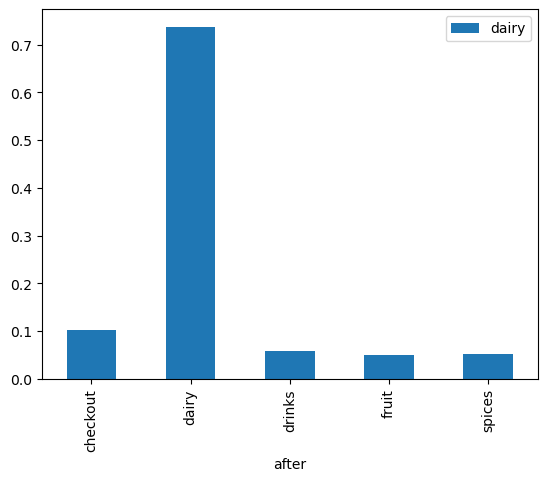

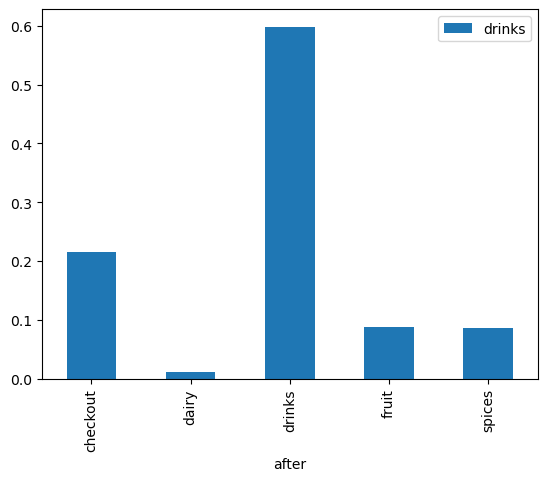

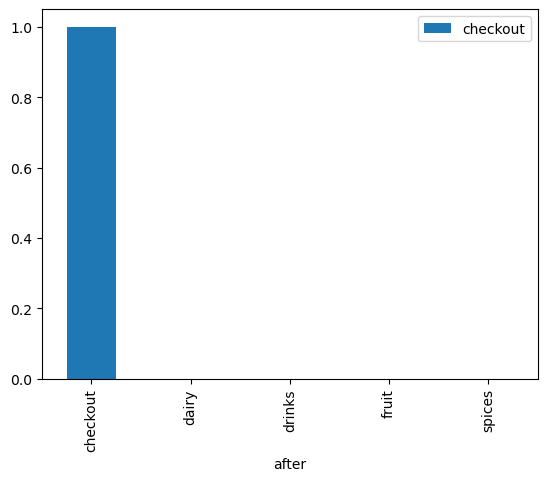

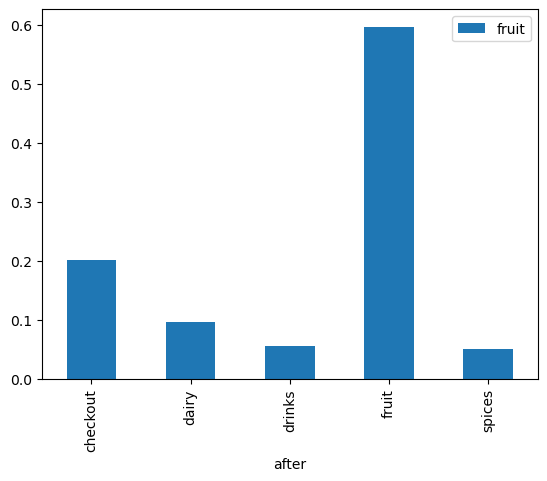

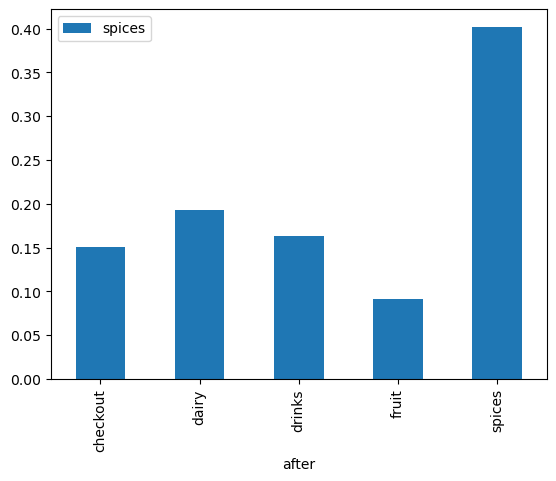

In [68]:
plot_probabilities(P);

In [69]:
# Probabilities of customers every minute
df_all.groupby(["time", "day"])[["new_id"]].count().reset_index().groupby("time")["new_id"].max()
# df_time

## Here there are a few possibilities
# 1. We consider a for loop for min and max customers for each time
# 2. We consider the average count for each time. 


time
06:59:00     6
07:00:00     7
07:01:00     7
07:02:00    13
07:03:00    13
            ..
21:47:00    13
21:48:00    11
21:49:00    10
21:50:00     9
21:51:00     4
Name: new_id, Length: 893, dtype: int64

In [70]:
df_time["after"] = df_time['new_id'].shift(-1).fillna(0)

NameError: name 'df_time' is not defined

In [ ]:
pd.crosstab(index=df_time['timestamp'],columns=df_time['new_id'],normalize=0).round(3)


new_id,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,35,36,37,40,41
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-09-02 07:02:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-02 07:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-02 07:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-02 07:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-02 07:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-06 21:47:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-06 21:48:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-06 21:49:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
